In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
from numpy import genfromtxt
from trueskill import TrueSkill, Rating, quality_1vs1, rate_1vs1
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec
from matplotlib.pyplot import figure
from matplotlib import cm
from scipy import stats
import operator as op
import pandas as pd
from ast import literal_eval
from mpl_toolkits.mplot3d import Axes3D
import math
import sys

import mygabasic as ga
 
%aimport mygabasic

HOlA MYGABASIC


# Multimodal Optimization

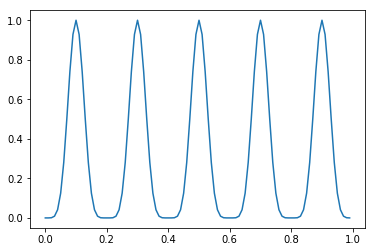

In [2]:
def M1(x):
    out = np.power(np.sin(5*np.pi*x), 6)
    return out
# This function receives a bit array as argument
def M1BinString(binString):
    codeLen = 16 
    fevalMtx = ga.gdeco(bitlist = binString, minVal = 0, maxVal = 1, codeLen = codeLen)
    return M1(fevalMtx)

x = np.arange(0, 1, 0.01)
y = M1(x)
plt.plot(x, y)
plt.show()  

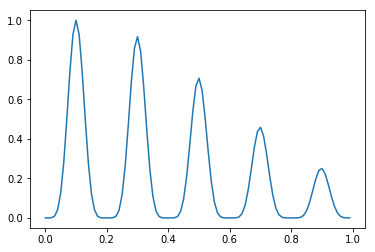

In [3]:
def M2(x):
    out = np.exp(-2*np.log(2)*np.power(((x-0.1)/0.8),2))*M1(x)
    return out

# This function receives a bit array as argument
def M2BinString(binString):
    codeLen = 16 
    fevalMtx = ga.gdeco(bitlist = binString, minVal = 0, maxVal = 1, codeLen = codeLen)
    return M2(fevalMtx)

x = np.arange(0, 1, 0.01)
y = M2(x)
plt.plot(x, y)
plt.show()  

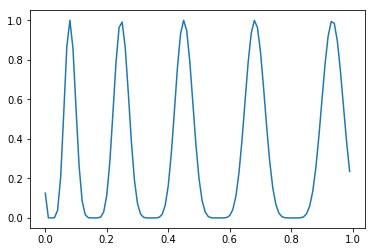

In [4]:
def M3(x):
    out = np.power(np.sin(5*np.pi*(np.power(x,0.75) - 0.05)), 6)
    return out

# This function receives a bit array as argument
def M3BinString(binString):
    codeLen = 16 
    fevalMtx = ga.gdeco(bitlist = binString, minVal = 0, maxVal = 1, codeLen = codeLen)
    return M3(fevalMtx)
x = np.arange(0, 1, 0.01)
y = M3(x)
plt.plot(x, y)
plt.show()  

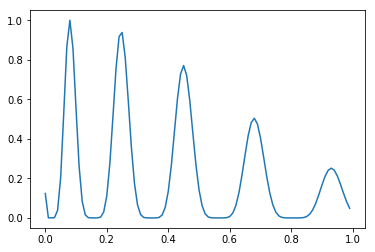

In [5]:
def M4(x):
    out = np.exp(-2*np.log(2)*np.power(((x-0.08)/0.854),2))*M3(x)
    return out

# This function receives a bit array as argument
def M4BinString(binString):
    codeLen = 16 
    fevalMtx = ga.gdeco(bitlist = binString, minVal = 0, maxVal = 1, codeLen = codeLen)
    return M4(fevalMtx)

x = np.arange(0, 1, 0.01)
y = M4(x)
plt.plot(x, y)
plt.show()  

## Deterministic Crowding

### M1

 Iteration 54

Last fit info______
Last fit mean: 0.8162144930312345
Last fit std: 0.26953584749874554
Last fit median: 0.9952437322211505
Last fit min: 3.203247408560614e-05
Last fit max: 0.9999993105952689
Last Pop info______
Last Pop mean: [0.55008035]
Last Pop std: [0.33503213]
Last Pop median: [0.67187762]
Last Pop min: [0.09797055]
Last Pop max: [0.95317769]


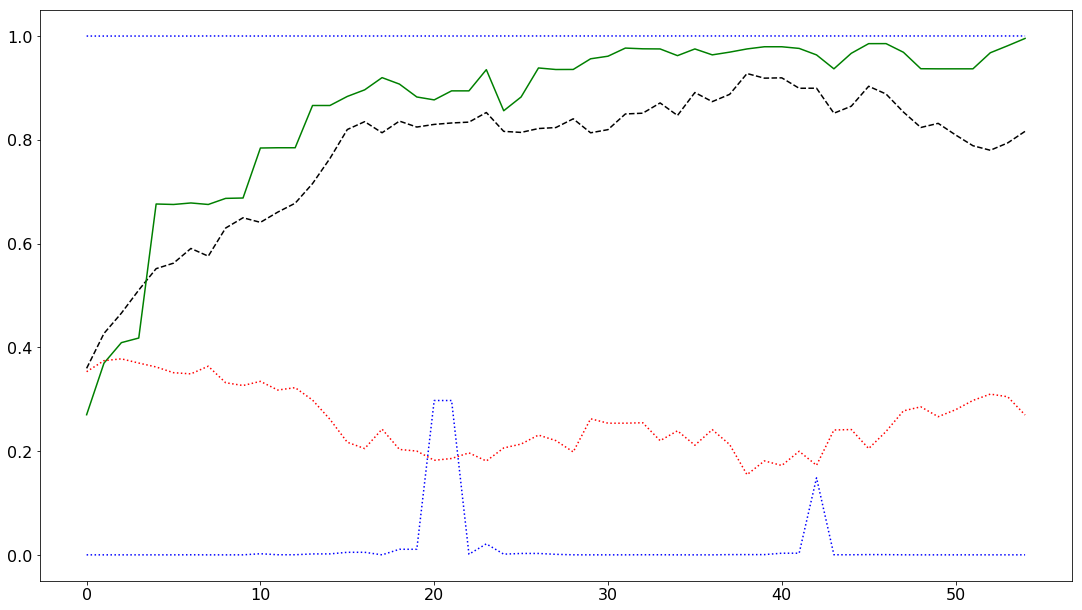

In [6]:
# Generate population
N = 128
minVal = 0
maxVal = 1
codeLen = 16
genQty = 1
d = codeLen * genQty
iterations = 55
matingPercent = 0.7
mutaPercent = 0.0625
# Initial population
Pop = ga.pgenerator(N=N,d =d)
# Evolving output matrix
OUT_Matrix = np.zeros((5, iterations))
Iterations = []

for i in range(iterations):
    sys.stdout.write("\r Iteration " + str(i))
    sys.stdout.flush()
    Iterations.append(i)
    # Workout population fitness
    fitList,fitVal = ga.popfitnes(pop = Pop,minVal = minVal, maxVal = maxVal, codeLen = codeLen, genQty = genQty, funct = M1)
    
    OUT_Matrix[0][i] = np.mean(fitList)
    OUT_Matrix[1][i] = np.median(fitList)
    OUT_Matrix[2][i] = np.max(fitList)
    OUT_Matrix[3][i] = np.min(fitList)
    OUT_Matrix[4][i] = np.std(fitList)
    
    # pselect = ga.tournamentSelection(Pop, fitList, int(N/2))
    pselect = ga.randomUniformSelection(Pop, fitList, int(N/2))
    # pselect = ga.tournamentSelection4Max(Pop, fitList, int(N/2))
    
    if i == (iterations - 1):
        # in last iteration children are equal to parents
        matingPercent = -1   
    children = ga.childenGen_MultyM(pselect,
                                    matingPercent = matingPercent,
                                    mutaPercent = mutaPercent,
                                    minVal = minVal,
                                    maxVal = maxVal,
                                    codeLen = codeLen,
                                    funct = M1)
    Pop = children
    
# Last populatio fitness
print('\n')
print('Last fit info______')
print('Last fit mean: ' + str(np.mean(fitList)))
print('Last fit std: ' + str(np.std(fitList)))
print('Last fit median: ' + str(np.median(fitList)))
print('Last fit min: ' + str(np.amin(fitList)))
print('Last fit max: ' + str(np.amax(fitList)))
print('Last Pop info______')
print('Last Pop mean: ' + str(np.mean(fitVal, axis=0)))
print('Last Pop std: ' + str(np.std(fitVal, axis=0)))
print('Last Pop median: ' + str(np.median(fitVal, axis=0)))
print('Last Pop min: ' + str(np.amin(fitVal, axis=0)))
print('Last Pop max: ' + str(np.amax(fitVal, axis=0)))


# multy curve plot
plt.rcParams.update({'font.size': 16})
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.plot(np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[2]),
         'b:',
         np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[3]),
         'b:',
         np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[0]),
         'k--',
         np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[1]),
         'g-',
         np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[4]),
         'r:',)
fitList,fitVal = ga.popfitnes(pop = Pop,minVal = minVal, maxVal = maxVal, codeLen = codeLen, genQty = genQty, funct = M1)




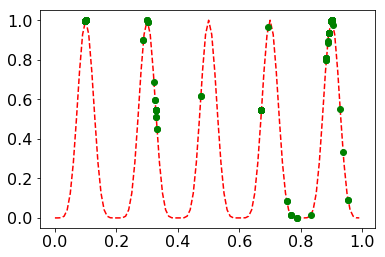

In [7]:
x = np.arange(0, 1, 0.01)
y = M1(x)
opt = M1(fitVal)
plt.plot(x, y,'r--',fitVal,opt,'go')
plt.show()

## M1 Deterministic Crowding + HADEA

 Iteration 0

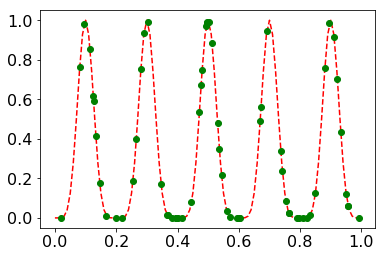

 Iteration 50

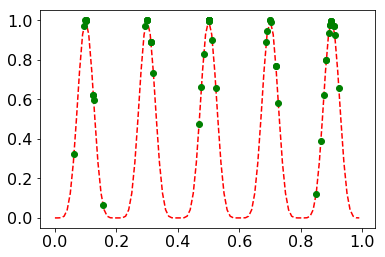

 Iteration 100

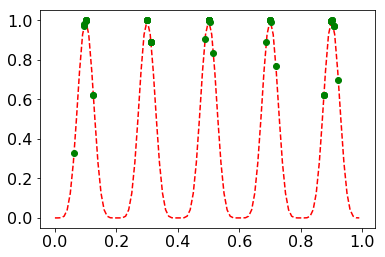

 Iteration 150

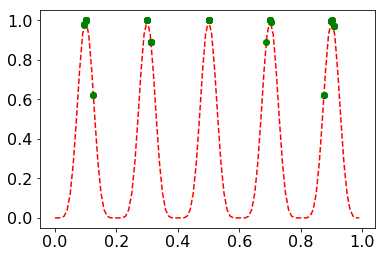

 Iteration 200

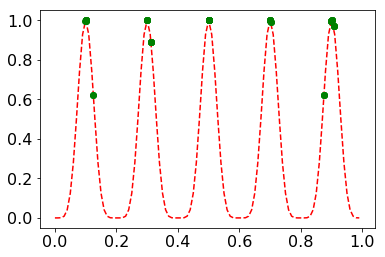

 Iteration 249

Last fit info______
Last fit mean: 0.9659090018473543
Last fit std: 0.09359667801596365
Last fit median: 0.9999708730182487
Last fit min: 0.6216276877813415
Last fit max: 1.0
Last Pop info______
Last Pop mean: [0.51919442]
Last Pop std: [0.27284239]
Last Pop median: [0.50001526]
Last Pop min: [0.09911498]
Last Pop max: [0.90627146]


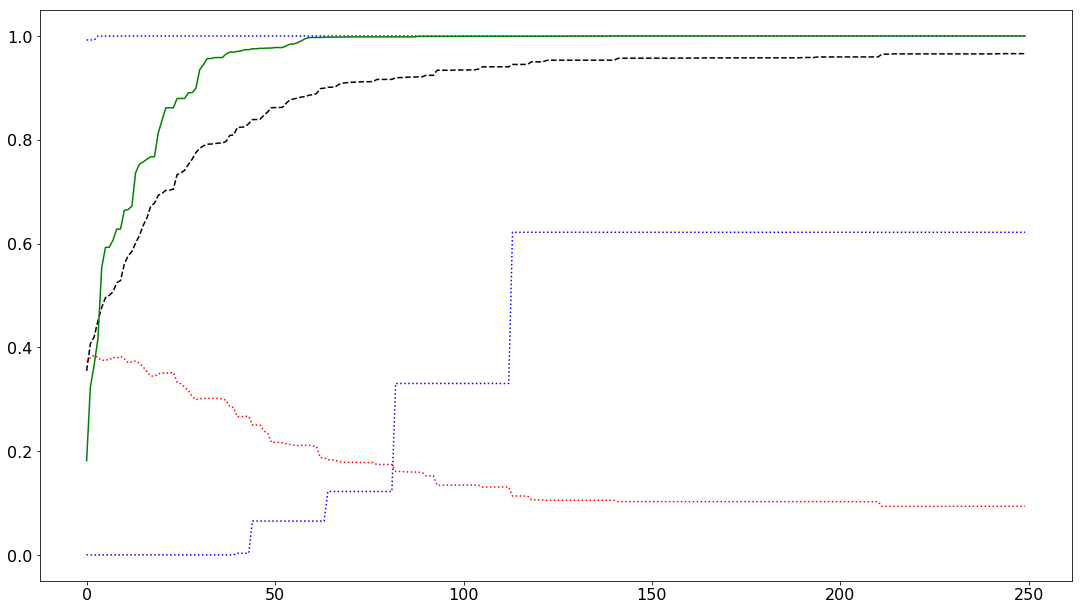

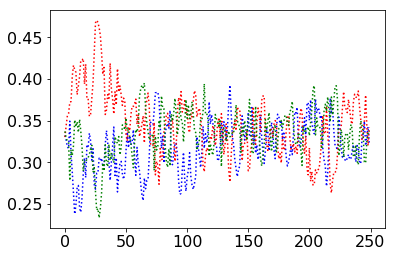

In [16]:
# Generate population
N = 64
minVal = 0
maxVal = 1
codeLen = 16
genQty = 1
# Not used
lnrate = 1
d = codeLen * genQty
iterations = 250
matingPercent = 0.7
mutaPercent = 1/codeLen*1
# Initial population
Pop = ga.pgenerator(N=N,d =d)
# print(Pop)
# Generation of inital random GA operator application probabilities
# 0: Mutation, 1: Mating
gopp = ga.pgenerator4Gop(N=N,d = 3)
# Evolving output matrix
OUT_Matrix = np.zeros((5, iterations))
GOP_Matrix = np.zeros((3, iterations))
Iterations = []

for i in range(iterations):
    sys.stdout.write("\r Iteration " + str(i))
    sys.stdout.flush()
    Iterations.append(i)
    # Workout population fitness
    fitList,fitVal = ga.popfitnes(pop = Pop,minVal = minVal, maxVal = maxVal, codeLen = codeLen, genQty = genQty, funct = M1)
    
    # pselect = ga.tournamentSelection(Pop, fitList, int(N/2))
    pselect = ga.randomUniformSelection(Pop, fitList, int(N/2))
    # pselect = ga.tournamentSelection4Max(Pop, fitList, int(N/2))
    
    children,gopp = ga.childenGen_MultyM_haeaMax(Pop, 
                                                 pselect, 
                                                 gopp, 
                                                 fitList, 
                                                 M1BinString, 
                                                 mutaPercent, 
                                                 lnrate,
                                                 minVal,
                                                 maxVal,
                                                 codeLen)
    Pop = children
    
    # Workout population fitness
    fitList,fitVal = ga.popfitnes(pop = Pop,minVal = minVal, maxVal = maxVal, codeLen = codeLen, genQty = genQty, funct = M1)
    if i%50 == 0:
        x = np.arange(0, 1, 0.01)
        y = M1(x)
        opt = M1(fitVal)
        plt.plot(x, y,'r--',fitVal,opt,'go')
        plt.savefig('multimodalM1_' + str(i) + '.pdf', format='pdf')
        plt.show()
    OUT_Matrix[0][i] = np.mean(fitList)
    OUT_Matrix[1][i] = np.median(fitList)
    OUT_Matrix[2][i] = np.max(fitList)
    OUT_Matrix[3][i] = np.min(fitList)
    OUT_Matrix[4][i] = np.std(fitList)
    GOP_Matrix[0][i] = np.mean(gopp[:,0])
    GOP_Matrix[1][i] = np.mean(gopp[:,1])
    GOP_Matrix[2][i] = np.mean(gopp[:,2])
    
# Last populatio fitness
print('\n')
print('Last fit info______')
print('Last fit mean: ' + str(np.mean(fitList)))
print('Last fit std: ' + str(np.std(fitList)))
print('Last fit median: ' + str(np.median(fitList)))
print('Last fit min: ' + str(np.amin(fitList)))
print('Last fit max: ' + str(np.amax(fitList)))
print('Last Pop info______')
print('Last Pop mean: ' + str(np.mean(fitVal, axis=0)))
print('Last Pop std: ' + str(np.std(fitVal, axis=0)))
print('Last Pop median: ' + str(np.median(fitVal, axis=0)))
print('Last Pop min: ' + str(np.amin(fitVal, axis=0)))
print('Last Pop max: ' + str(np.amax(fitVal, axis=0)))


# multy curve plot
plt.rcParams.update({'font.size': 16})
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.plot(np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[2]),
         'b:',
         np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[3]),
         'b:',
         np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[0]),
         'k--',
         np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[1]),
         'g-',
         np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[4]),
         'r:',)
plt.savefig('multimodalM1_Statistics.pdf', format='pdf')
plt.show()

plt.plot(np.squeeze(Iterations),
         np.squeeze(GOP_Matrix[0]),
         'b:',
         np.squeeze(Iterations),
         np.squeeze(GOP_Matrix[1]),
         'r:',
         np.squeeze(Iterations),
         np.squeeze(GOP_Matrix[2]),
         'g:')

plt.savefig('multimodalM1_Haea.pdf', format='pdf')
plt.show()
plt.show()


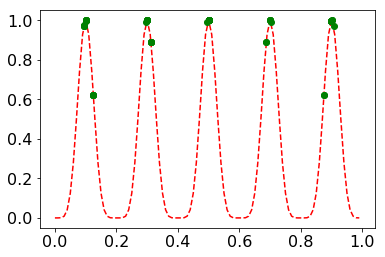

In [15]:
x = np.arange(0, 1, 0.01)
y = M1(x)
opt = M1(fitVal)
plt.plot(x, y,'r--',fitVal,opt,'go')
plt.show()

### M2

 Iteration 54

Last fit info______
Last fit mean: 0.980483956149645
Last fit std: 0.09496594831204544
Last fit median: 0.9999729484289838
Last fit min: 2.4344797755959526e-06
Last fit max: 1.0
Last Pop info______
Last Pop mean: [0.12093884]
Last Pop std: [0.06215706]
Last Pop median: [0.10009155]
Last Pop min: [0.00742351]
Last Pop max: [0.35606165]


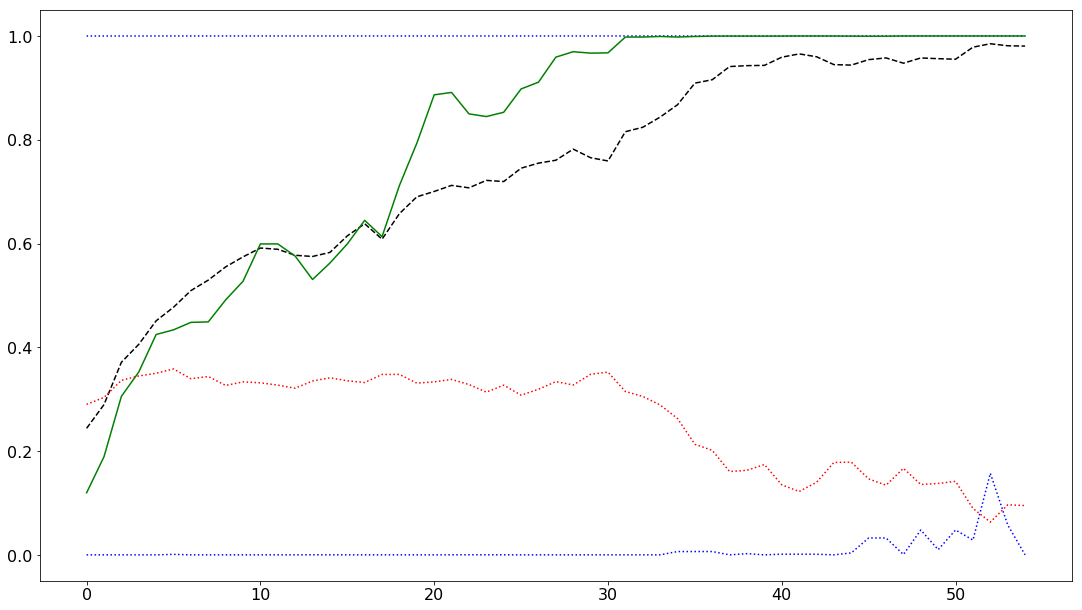

In [10]:
# Generate population
N = 256
minVal = 0
maxVal = 1
codeLen = 16
genQty = 1
d = codeLen * genQty
iterations = 55
matingPercent = 0.7
mutaPercent = 0.07
# Initial population
Pop = ga.pgenerator(N=N,d =d)
# Evolving output matrix
OUT_Matrix = np.zeros((5, iterations))
Iterations = []

for i in range(iterations):
    sys.stdout.write("\r Iteration " + str(i))
    sys.stdout.flush()
    Iterations.append(i)
    # Workout population fitness
    fitList,fitVal = ga.popfitnes(pop = Pop,minVal = minVal, maxVal = maxVal, codeLen = codeLen, genQty = genQty, funct = M2)
    
    OUT_Matrix[0][i] = np.mean(fitList)
    OUT_Matrix[1][i] = np.median(fitList)
    OUT_Matrix[2][i] = np.max(fitList)
    OUT_Matrix[3][i] = np.min(fitList)
    OUT_Matrix[4][i] = np.std(fitList)
    
    # pselect = ga.tournamentSelection(Pop, fitList, int(N/2))
    pselect = ga.randomUniformSelection(Pop, fitList, int(N/2))
    if i == (iterations - 1):
        # in last iteration children are equal to parents
        matingPercent = -1   
    children = ga.childenGen_MultyM(pselect,
                                    matingPercent = matingPercent,
                                    mutaPercent = mutaPercent,
                                    minVal = minVal,
                                    maxVal = maxVal,
                                    codeLen = codeLen,
                                    funct = M2)
    Pop = children
    
# Last populatio fitness
print('\n')
print('Last fit info______')
print('Last fit mean: ' + str(np.mean(fitList)))
print('Last fit std: ' + str(np.std(fitList)))
print('Last fit median: ' + str(np.median(fitList)))
print('Last fit min: ' + str(np.amin(fitList)))
print('Last fit max: ' + str(np.amax(fitList)))
print('Last Pop info______')
print('Last Pop mean: ' + str(np.mean(fitVal, axis=0)))
print('Last Pop std: ' + str(np.std(fitVal, axis=0)))
print('Last Pop median: ' + str(np.median(fitVal, axis=0)))
print('Last Pop min: ' + str(np.amin(fitVal, axis=0)))
print('Last Pop max: ' + str(np.amax(fitVal, axis=0)))


# multy curve plot
plt.rcParams.update({'font.size': 16})
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.plot(np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[2]),
         'b:',
         np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[3]),
         'b:',
         np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[0]),
         'k--',
         np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[1]),
         'g-',
         np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[4]),
         'r:',)
fitList,fitVal = ga.popfitnes(pop = Pop,minVal = minVal, maxVal = maxVal, codeLen = codeLen, genQty = genQty, funct = M2)





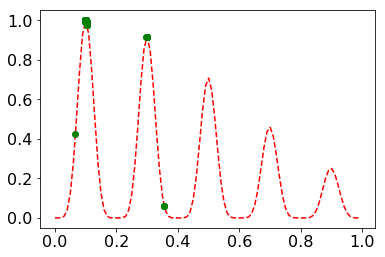

In [11]:
x = np.arange(0, 1, 0.01)
y = M2(x)
opt = M2(fitVal)
plt.plot(x, y,'r--',fitVal,opt,'go')
plt.show()

## M2 Deterministic Crowding + HADEA

 Iteration 0

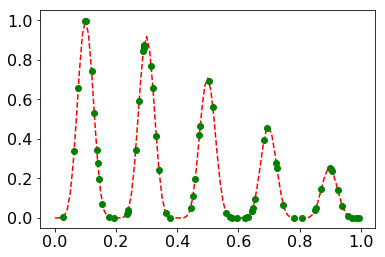

 Iteration 50

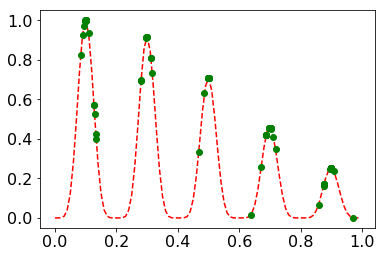

 Iteration 100

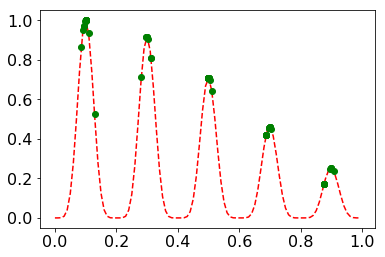

 Iteration 150

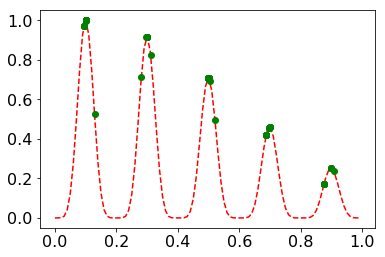

 Iteration 200

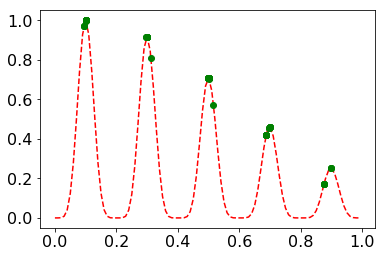

 Iteration 249

Last fit info______
Last fit mean: 0.6837607070209779
Last fit std: 0.27607467633693356
Last fit median: 0.7074542892106693
Last fit min: 0.1693407751088708
Last fit max: 1.0
Last Pop info______
Last Pop mean: [0.46167554]
Last Pop std: [0.26874996]
Last Pop median: [0.49942779]
Last Pop min: [0.0937438]
Last Pop max: [0.89772641]


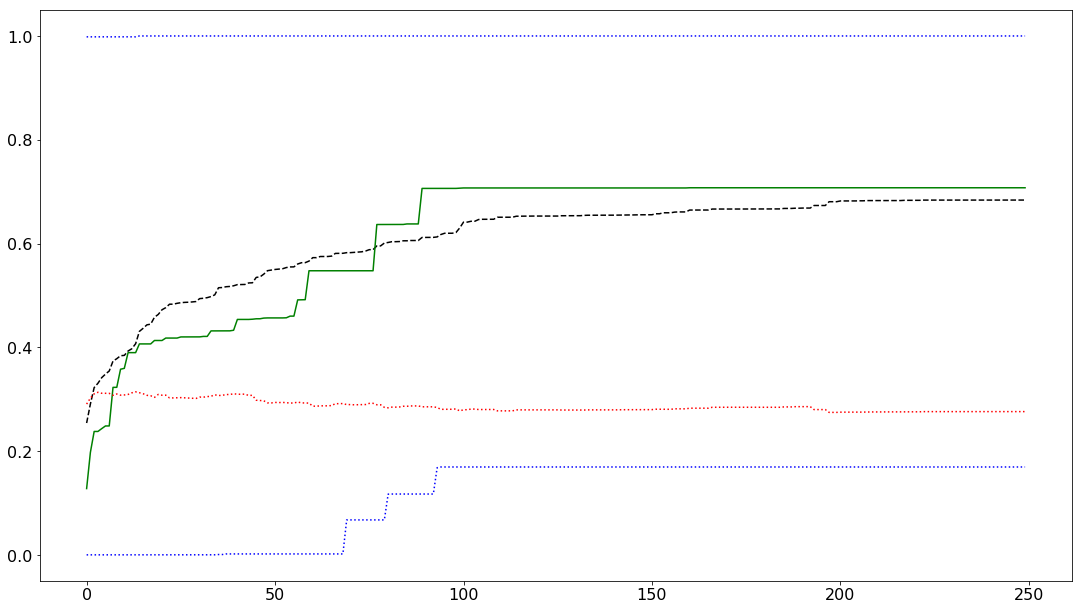

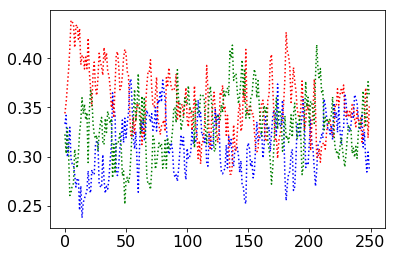

In [22]:
# Generate population
N = 64
minVal = 0
maxVal = 1
codeLen = 16
genQty = 1
# Not used
lnrate = 1
d = codeLen * genQty
iterations = 250
matingPercent = 0.7
mutaPercent = 1/codeLen*1
# Initial population
Pop = ga.pgenerator(N=N,d =d)
# print(Pop)
# Generation of inital random GA operator application probabilities
# 0: Mutation, 1: Mating
gopp = ga.pgenerator4Gop(N=N,d = 3)
# Evolving output matrix
OUT_Matrix = np.zeros((5, iterations))
GOP_Matrix = np.zeros((3, iterations))
Iterations = []

for i in range(iterations):
    sys.stdout.write("\r Iteration " + str(i))
    sys.stdout.flush()
    Iterations.append(i)
    # Workout population fitness
    fitList,fitVal = ga.popfitnes(pop = Pop,minVal = minVal, maxVal = maxVal, codeLen = codeLen, genQty = genQty, funct = M2)
     
    # pselect = ga.tournamentSelection(Pop, fitList, int(N/2))
    pselect = ga.randomUniformSelection(Pop, fitList, int(N/2))
    # pselect = ga.tournamentSelection4Max(Pop, fitList, int(N/2))
    
    children,gopp = ga.childenGen_MultyM_haeaMax(Pop, 
                                                 pselect, 
                                                 gopp, 
                                                 fitList, 
                                                 M2BinString, 
                                                 mutaPercent, 
                                                 lnrate,
                                                 minVal,
                                                 maxVal,
                                                 codeLen)
    Pop = children
    # Workout population fitness
    fitList,fitVal = ga.popfitnes(pop = Pop,minVal = minVal, maxVal = maxVal, codeLen = codeLen, genQty = genQty, funct = M2)
    if i%50 == 0:
        x = np.arange(0, 1, 0.01)
        y = M2(x)
        opt = M2(fitVal)
        plt.plot(x, y,'r--',fitVal,opt,'go')
        plt.savefig('multimodalM2_' + str(i) + '.pdf', format='pdf')
        plt.show()
    OUT_Matrix[0][i] = np.mean(fitList)
    OUT_Matrix[1][i] = np.median(fitList)
    OUT_Matrix[2][i] = np.max(fitList)
    OUT_Matrix[3][i] = np.min(fitList)
    OUT_Matrix[4][i] = np.std(fitList)
    GOP_Matrix[0][i] = np.mean(gopp[:,0])
    GOP_Matrix[1][i] = np.mean(gopp[:,1])
    GOP_Matrix[2][i] = np.mean(gopp[:,2])
    
# Last populatio fitness
print('\n')
print('Last fit info______')
print('Last fit mean: ' + str(np.mean(fitList)))
print('Last fit std: ' + str(np.std(fitList)))
print('Last fit median: ' + str(np.median(fitList)))
print('Last fit min: ' + str(np.amin(fitList)))
print('Last fit max: ' + str(np.amax(fitList)))
print('Last Pop info______')
print('Last Pop mean: ' + str(np.mean(fitVal, axis=0)))
print('Last Pop std: ' + str(np.std(fitVal, axis=0)))
print('Last Pop median: ' + str(np.median(fitVal, axis=0)))
print('Last Pop min: ' + str(np.amin(fitVal, axis=0)))
print('Last Pop max: ' + str(np.amax(fitVal, axis=0)))


# multy curve plot
plt.rcParams.update({'font.size': 16})
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.plot(np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[2]),
         'b:',
         np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[3]),
         'b:',
         np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[0]),
         'k--',
         np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[1]),
         'g-',
         np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[4]),
         'r:',)
plt.savefig('multimodalM2_Statistics.pdf', format='pdf')
plt.show()

plt.plot(np.squeeze(Iterations),
         np.squeeze(GOP_Matrix[0]),
         'b:',
         np.squeeze(Iterations),
         np.squeeze(GOP_Matrix[1]),
         'r:',
         np.squeeze(Iterations),
         np.squeeze(GOP_Matrix[2]),
         'g:')

plt.savefig('multimodalM2_Haea.pdf', format='pdf')
plt.show()



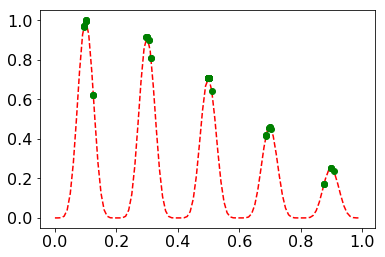

In [20]:
x = np.arange(0, 1, 0.01)
y = M2(x)
opt = M2(fitVal)
plt.plot(x, y,'r--',fitVal,opt,'go')
plt.show()

### M3

 Iteration 49

Last fit info______
Last fit mean: 0.9609468347933512
Last fit std: 0.1623655531536818
Last fit median: 0.9994686459791795
Last fit min: 0.05926207074419381
Last fit max: 0.9999999333593609
Last Pop info______
Last Pop mean: [0.37960262]
Last Pop std: [0.1758903]
Last Pop median: [0.45042344]
Last Pop min: [0.07730983]
Last Pop max: [0.93756771]


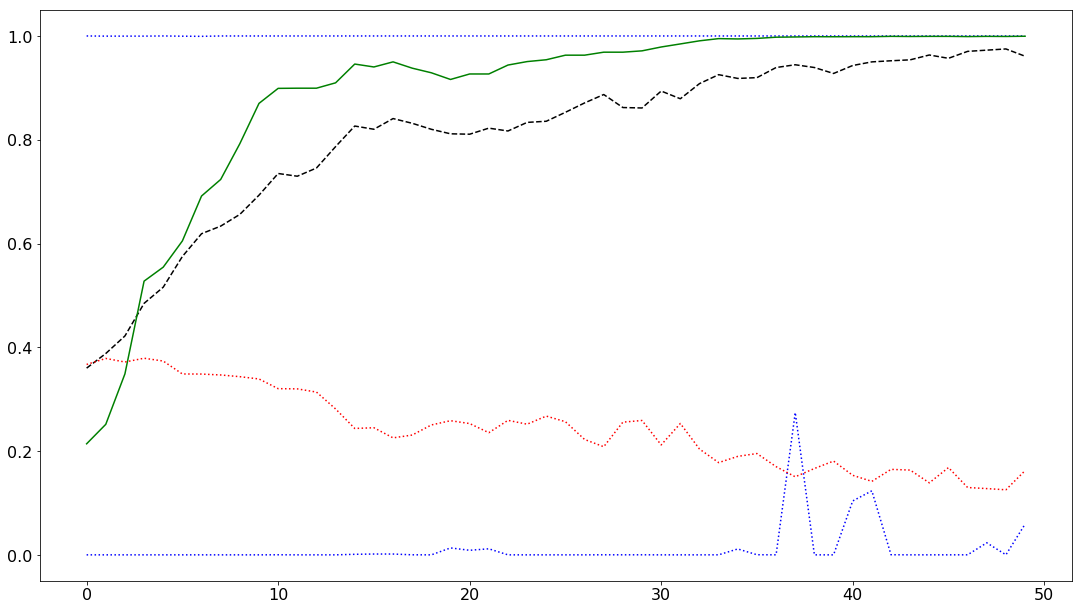

In [14]:
# Generate population
N = 256
minVal = 0
maxVal = 1
codeLen = 16
genQty = 1
d = codeLen * genQty
iterations = 50
matingPercent = 0.7
mutaPercent = 0.07
# Initial population
Pop = ga.pgenerator(N=N,d =d)
# Evolving output matrix
OUT_Matrix = np.zeros((5, iterations))
Iterations = []

for i in range(iterations):
    sys.stdout.write("\r Iteration " + str(i))
    sys.stdout.flush()
    Iterations.append(i)
    # Workout population fitness
    fitList,fitVal = ga.popfitnes(pop = Pop,minVal = minVal, maxVal = maxVal, codeLen = codeLen, genQty = genQty, funct = M3)
    
    OUT_Matrix[0][i] = np.mean(fitList)
    OUT_Matrix[1][i] = np.median(fitList)
    OUT_Matrix[2][i] = np.max(fitList)
    OUT_Matrix[3][i] = np.min(fitList)
    OUT_Matrix[4][i] = np.std(fitList)
    
    # pselect = ga.tournamentSelection(Pop, fitList, int(N/2))
    pselect = ga.randomUniformSelection(Pop, fitList, int(N/2))
    
    if i == (iterations - 1):
        # in last iteration children are equal to parents
        matingPercent = -1   
    children = ga.childenGen_MultyM(pselect,
                                    matingPercent = matingPercent,
                                    mutaPercent = mutaPercent,
                                    minVal = minVal,
                                    maxVal = maxVal,
                                    codeLen = codeLen,
                                    funct = M3)
    Pop = children
    
# Last populatio fitness
print('\n')
print('Last fit info______')
print('Last fit mean: ' + str(np.mean(fitList)))
print('Last fit std: ' + str(np.std(fitList)))
print('Last fit median: ' + str(np.median(fitList)))
print('Last fit min: ' + str(np.amin(fitList)))
print('Last fit max: ' + str(np.amax(fitList)))
print('Last Pop info______')
print('Last Pop mean: ' + str(np.mean(fitVal, axis=0)))
print('Last Pop std: ' + str(np.std(fitVal, axis=0)))
print('Last Pop median: ' + str(np.median(fitVal, axis=0)))
print('Last Pop min: ' + str(np.amin(fitVal, axis=0)))
print('Last Pop max: ' + str(np.amax(fitVal, axis=0)))


# multy curve plot
plt.rcParams.update({'font.size': 16})
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.plot(np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[2]),
         'b:',
         np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[3]),
         'b:',
         np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[0]),
         'k--',
         np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[1]),
         'g-',
         np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[4]),
         'r:',)
fitList,fitVal = ga.popfitnes(pop = Pop,minVal = minVal, maxVal = maxVal, codeLen = codeLen, genQty = genQty, funct = M3)






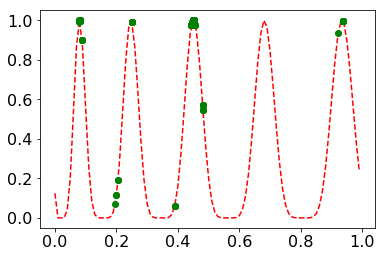

In [15]:
x = np.arange(0, 1, 0.01)
y = M3(x)
opt = M3(fitVal)
plt.plot(x, y,'r--',fitVal,opt,'go')
plt.show()

## M3 Deterministic Crowding + HADEA

 Iteration 0

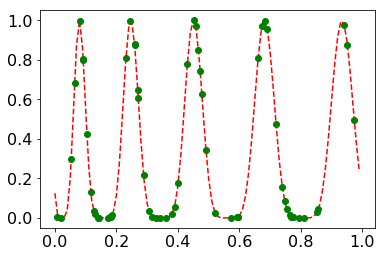

 Iteration 50

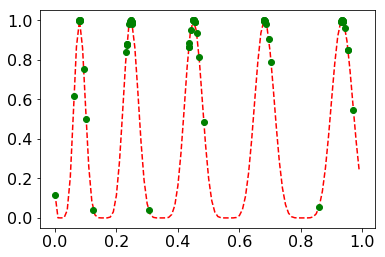

 Iteration 100

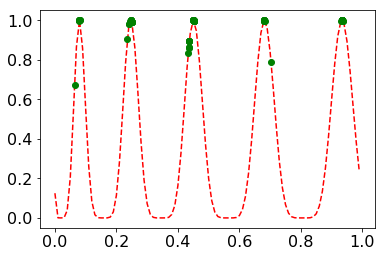

 Iteration 150

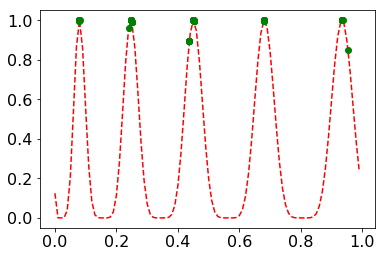

 Iteration 200

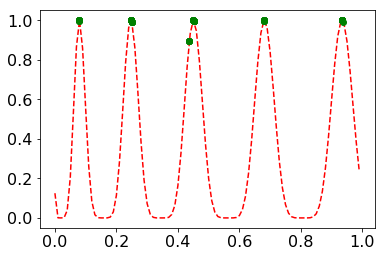

 Iteration 249

Last fit info______
Last fit mean: 0.9953423708395293
Last fit std: 0.017812492425648262
Last fit median: 0.9999952584376612
Last fit min: 0.8973287533520832
Last fit max: 0.9999999991680288
Last Pop info______
Last Pop mean: [0.50541099]
Last Pop std: [0.29235762]
Last Pop median: [0.45123217]
Last Pop min: [0.07811856]
Last Pop max: [0.93752193]


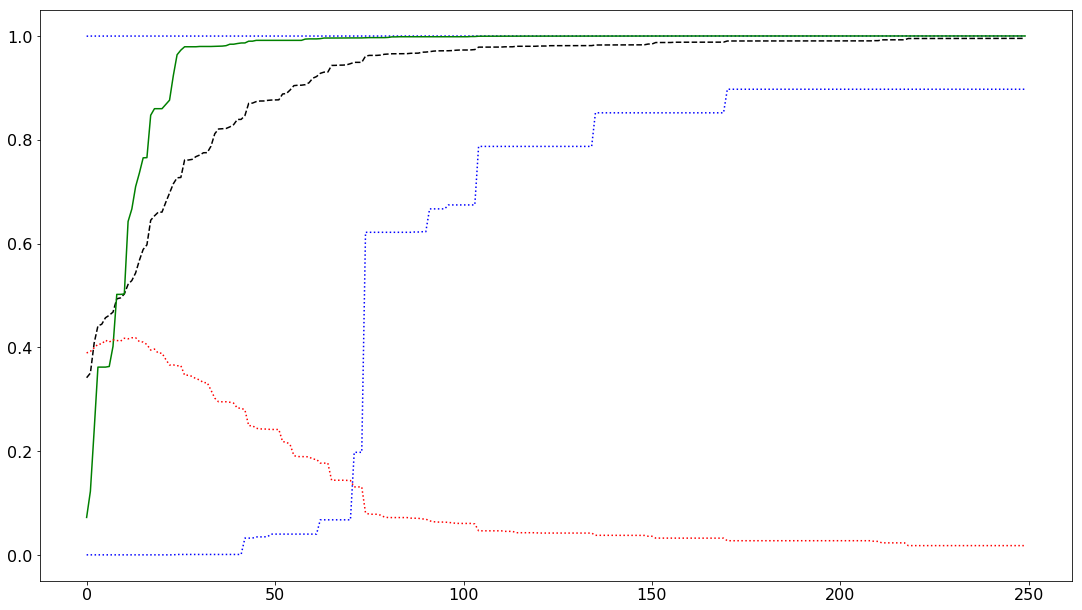

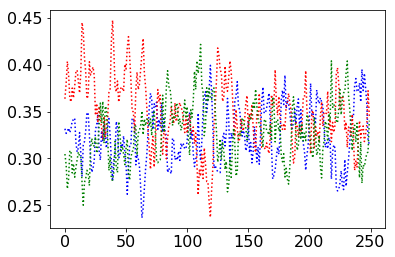

In [23]:
# Generate population
N = 64
minVal = 0
maxVal = 1
codeLen = 16
genQty = 1
# Not used
lnrate = 1
d = codeLen * genQty
iterations = 250
matingPercent = 0.7
mutaPercent = 1/codeLen*1
# Initial population
Pop = ga.pgenerator(N=N,d =d)
# print(Pop)
# Generation of inital random GA operator application probabilities
# 0: Mutation, 1: Mating
gopp = ga.pgenerator4Gop(N=N,d = 3)
# Evolving output matrix
OUT_Matrix = np.zeros((5, iterations))
GOP_Matrix = np.zeros((3, iterations))
Iterations = []

for i in range(iterations):
    sys.stdout.write("\r Iteration " + str(i))
    sys.stdout.flush()
    Iterations.append(i)
    # Workout population fitness
    fitList,fitVal = ga.popfitnes(pop = Pop,minVal = minVal, maxVal = maxVal, codeLen = codeLen, genQty = genQty, funct = M3)
     
    # pselect = ga.tournamentSelection(Pop, fitList, int(N/2))
    pselect = ga.randomUniformSelection(Pop, fitList, int(N/2))
    # pselect = ga.tournamentSelection4Max(Pop, fitList, int(N/2))
    
    children,gopp = ga.childenGen_MultyM_haeaMax(Pop, 
                                                 pselect, 
                                                 gopp, 
                                                 fitList, 
                                                 M3BinString, 
                                                 mutaPercent, 
                                                 lnrate,
                                                 minVal,
                                                 maxVal,
                                                 codeLen)
    Pop = children
    # Workout population fitness
    fitList,fitVal = ga.popfitnes(pop = Pop,minVal = minVal, maxVal = maxVal, codeLen = codeLen, genQty = genQty, funct = M3)
    if i%50 == 0:
        x = np.arange(0, 1, 0.01)
        y = M3(x)
        opt = M3(fitVal)
        plt.plot(x, y,'r--',fitVal,opt,'go')
        plt.savefig('multimodalM3_' + str(i) + '.pdf', format='pdf')
        plt.show()
    OUT_Matrix[0][i] = np.mean(fitList)
    OUT_Matrix[1][i] = np.median(fitList)
    OUT_Matrix[2][i] = np.max(fitList)
    OUT_Matrix[3][i] = np.min(fitList)
    OUT_Matrix[4][i] = np.std(fitList)
    GOP_Matrix[0][i] = np.mean(gopp[:,0])
    GOP_Matrix[1][i] = np.mean(gopp[:,1])
    GOP_Matrix[2][i] = np.mean(gopp[:,2])
    
# Last populatio fitness
print('\n')
print('Last fit info______')
print('Last fit mean: ' + str(np.mean(fitList)))
print('Last fit std: ' + str(np.std(fitList)))
print('Last fit median: ' + str(np.median(fitList)))
print('Last fit min: ' + str(np.amin(fitList)))
print('Last fit max: ' + str(np.amax(fitList)))
print('Last Pop info______')
print('Last Pop mean: ' + str(np.mean(fitVal, axis=0)))
print('Last Pop std: ' + str(np.std(fitVal, axis=0)))
print('Last Pop median: ' + str(np.median(fitVal, axis=0)))
print('Last Pop min: ' + str(np.amin(fitVal, axis=0)))
print('Last Pop max: ' + str(np.amax(fitVal, axis=0)))


# multy curve plot
plt.rcParams.update({'font.size': 16})
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.plot(np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[2]),
         'b:',
         np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[3]),
         'b:',
         np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[0]),
         'k--',
         np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[1]),
         'g-',
         np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[4]),
         'r:',)
plt.savefig('multimodalM3_Statistics.pdf', format='pdf')
plt.show()

plt.plot(np.squeeze(Iterations),
         np.squeeze(GOP_Matrix[0]),
         'b:',
         np.squeeze(Iterations),
         np.squeeze(GOP_Matrix[1]),
         'r:',
         np.squeeze(Iterations),
         np.squeeze(GOP_Matrix[2]),
         'g:')

plt.savefig('multimodalM3_Haea.pdf', format='pdf')
plt.show()




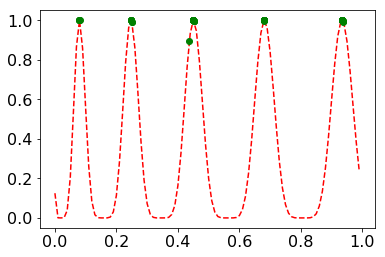

In [17]:
x = np.arange(0, 1, 0.01)
y = M3(x)
opt = M3(fitVal)
plt.plot(x, y,'r--',fitVal,opt,'go')
plt.show()

### M4

In [ ]:
# Generate population
N = 256
minVal = 0
maxVal = 1
codeLen = 16
genQty = 1
d = codeLen * genQty
iterations = 45
matingPercent = 0.7
mutaPercent = 0.07
# Initial population
Pop = ga.pgenerator(N=N,d =d)
# Evolving output matrix
OUT_Matrix = np.zeros((5, iterations))
Iterations = []

for i in range(iterations):
    sys.stdout.write("\r Iteration " + str(i))
    sys.stdout.flush()
    Iterations.append(i)
    # Workout population fitness
    fitList,fitVal = ga.popfitnes(pop = Pop,minVal = minVal, maxVal = maxVal, codeLen = codeLen, genQty = genQty, funct = M4)
    
    OUT_Matrix[0][i] = np.mean(fitList)
    OUT_Matrix[1][i] = np.median(fitList)
    OUT_Matrix[2][i] = np.max(fitList)
    OUT_Matrix[3][i] = np.min(fitList)
    OUT_Matrix[4][i] = np.std(fitList)
    
    # pselect = ga.tournamentSelection(Pop, fitList, int(N/2))
    pselect = ga.randomUniformSelection(Pop, fitList, int(N/2))
    if i == (iterations - 1):
        # in last iteration children are equal to parents
        matingPercent = -1   
    children = ga.childenGen_MultyM(pselect,
                                    matingPercent = matingPercent,
                                    mutaPercent = mutaPercent,
                                    minVal = minVal,
                                    maxVal = maxVal,
                                    codeLen = codeLen,
                                    funct = M4)
    Pop = children
    
# Last populatio fitness
print('\n')
print('Last fit info______')
print('Last fit mean: ' + str(np.mean(fitList)))
print('Last fit std: ' + str(np.std(fitList)))
print('Last fit median: ' + str(np.median(fitList)))
print('Last fit min: ' + str(np.amin(fitList)))
print('Last fit max: ' + str(np.amax(fitList)))
print('Last Pop info______')
print('Last Pop mean: ' + str(np.mean(fitVal, axis=0)))
print('Last Pop std: ' + str(np.std(fitVal, axis=0)))
print('Last Pop median: ' + str(np.median(fitVal, axis=0)))
print('Last Pop min: ' + str(np.amin(fitVal, axis=0)))
print('Last Pop max: ' + str(np.amax(fitVal, axis=0)))


# multy curve plot
plt.rcParams.update({'font.size': 16})
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.plot(np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[2]),
         'b:',
         np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[3]),
         'b:',
         np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[0]),
         'k--',
         np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[1]),
         'g-',
         np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[4]),
         'r:',)
fitList,fitVal = ga.popfitnes(pop = Pop,minVal = minVal, maxVal = maxVal, codeLen = codeLen, genQty = genQty, funct = M4)







 Iteration 44

Last fit info______
Last fit mean: 0.7502498817679875
Last fit std: 0.2683459134759162
Last fit median: 0.9307725300992218
Last fit min: 3.584956206868922e-05
Last fit max: 0.9999077051772837
Last Pop info______
Last Pop mean: [0.32702868]
Last Pop std: [0.20434305]
Last Pop median: [0.24828717]
Last Pop min: [0.06804761]
Last Pop max: [0.95477989]


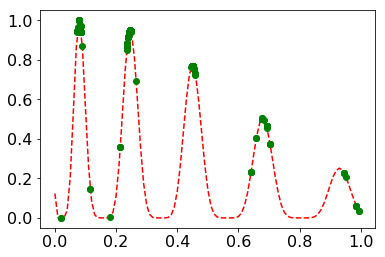

In [31]:
x = np.arange(0, 1, 0.01)
y = M4(x)
opt = M4(fitVal)
plt.plot(x, y,'r--',fitVal,opt,'go')
plt.show()

## M4 Deterministic Crowding + HADEA

 Iteration 0

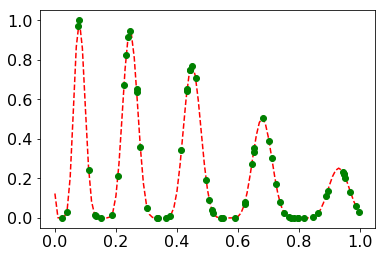

 Iteration 50

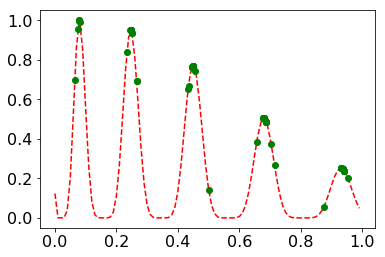

 Iteration 100

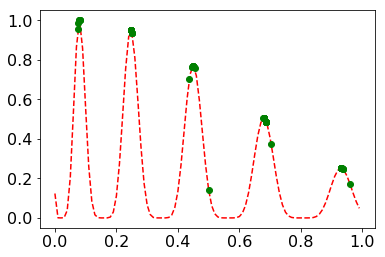

 Iteration 150

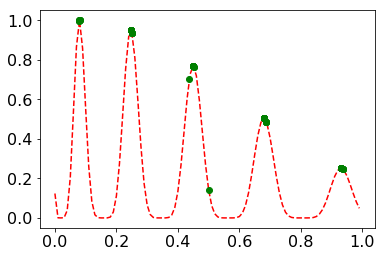

 Iteration 200

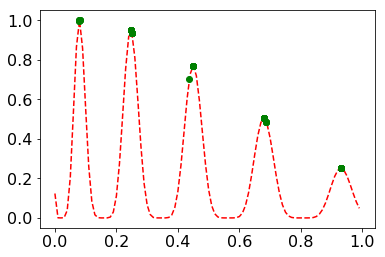

 Iteration 249

Last fit info______
Last fit mean: 0.6626282040920173
Last fit std: 0.25335545542680815
Last fit median: 0.5041115012344256
Last fit min: 0.2515870522758556
Last fit max: 0.9999997801163074
Last Pop info______
Last Pop mean: [0.5124814]
Last Pop std: [0.26914745]
Last Pop median: [0.67901122]
Last Pop min: [0.07811856]
Last Pop max: [0.9301976]


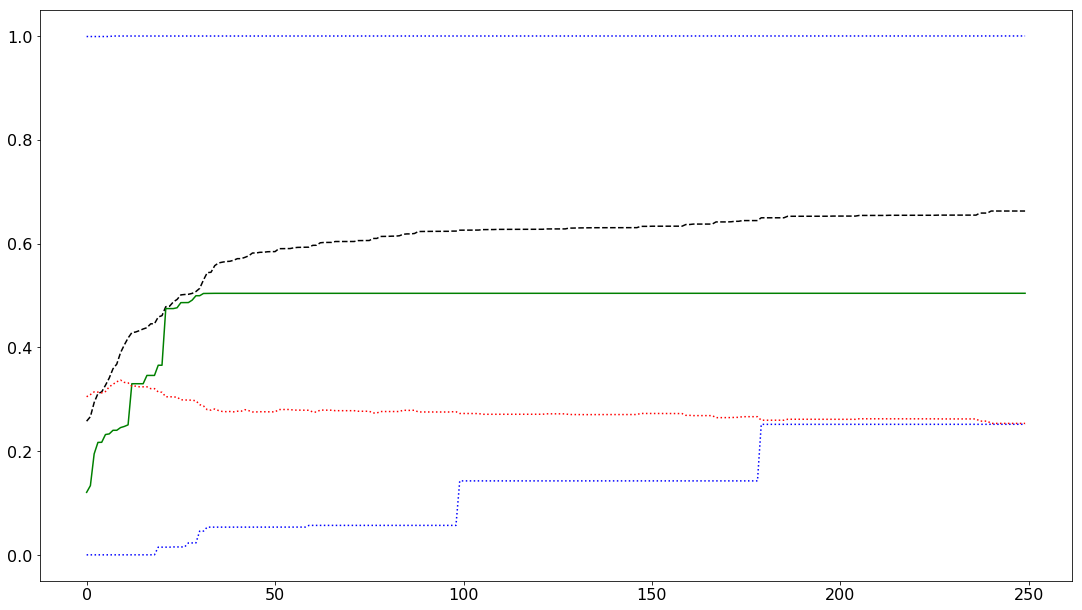

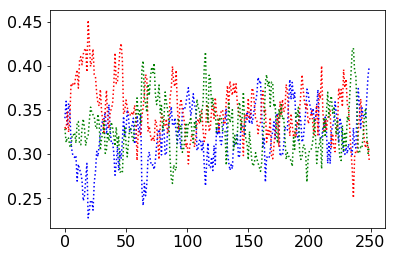

In [26]:
# Generate population
N = 64
minVal = 0
maxVal = 1
codeLen = 16
genQty = 1
# Not used
lnrate = 1
d = codeLen * genQty
iterations = 250
matingPercent = 0.7
mutaPercent = 1/codeLen*1
# Initial population
Pop = ga.pgenerator(N=N,d =d)
# print(Pop)
# Generation of inital random GA operator application probabilities
# 0: Mutation, 1: Mating
gopp = ga.pgenerator4Gop(N=N,d = 3)
# Evolving output matrix
OUT_Matrix = np.zeros((5, iterations))
GOP_Matrix = np.zeros((3, iterations))
Iterations = []

for i in range(iterations):
    sys.stdout.write("\r Iteration " + str(i))
    sys.stdout.flush()
    Iterations.append(i)
    # Workout population fitness
    fitList,fitVal = ga.popfitnes(pop = Pop,minVal = minVal, maxVal = maxVal, codeLen = codeLen, genQty = genQty, funct = M4)
     
    # pselect = ga.tournamentSelection(Pop, fitList, int(N/2))
    pselect = ga.randomUniformSelection(Pop, fitList, int(N/2))
    # pselect = ga.tournamentSelection4Max(Pop, fitList, int(N/2))
    
    children,gopp = ga.childenGen_MultyM_haeaMax(Pop, 
                                                 pselect, 
                                                 gopp, 
                                                 fitList, 
                                                 M4BinString, 
                                                 mutaPercent, 
                                                 lnrate,
                                                 minVal,
                                                 maxVal,
                                                 codeLen)
    Pop = children
    # Workout population fitness
    fitList,fitVal = ga.popfitnes(pop = Pop,minVal = minVal, maxVal = maxVal, codeLen = codeLen, genQty = genQty, funct = M4)
    if i%50 == 0:
        x = np.arange(0, 1, 0.01)
        y = M4(x)
        opt = M4(fitVal)
        plt.plot(x, y,'r--',fitVal,opt,'go')
        plt.savefig('multimodalM4_' + str(i) + '.pdf', format='pdf')
        plt.show()
    OUT_Matrix[0][i] = np.mean(fitList)
    OUT_Matrix[1][i] = np.median(fitList)
    OUT_Matrix[2][i] = np.max(fitList)
    OUT_Matrix[3][i] = np.min(fitList)
    OUT_Matrix[4][i] = np.std(fitList)
    GOP_Matrix[0][i] = np.mean(gopp[:,0])
    GOP_Matrix[1][i] = np.mean(gopp[:,1])
    GOP_Matrix[2][i] = np.mean(gopp[:,2])
    
# Last populatio fitness
print('\n')
print('Last fit info______')
print('Last fit mean: ' + str(np.mean(fitList)))
print('Last fit std: ' + str(np.std(fitList)))
print('Last fit median: ' + str(np.median(fitList)))
print('Last fit min: ' + str(np.amin(fitList)))
print('Last fit max: ' + str(np.amax(fitList)))
print('Last Pop info______')
print('Last Pop mean: ' + str(np.mean(fitVal, axis=0)))
print('Last Pop std: ' + str(np.std(fitVal, axis=0)))
print('Last Pop median: ' + str(np.median(fitVal, axis=0)))
print('Last Pop min: ' + str(np.amin(fitVal, axis=0)))
print('Last Pop max: ' + str(np.amax(fitVal, axis=0)))


# multy curve plot
plt.rcParams.update({'font.size': 16})
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.plot(np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[2]),
         'b:',
         np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[3]),
         'b:',
         np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[0]),
         'k--',
         np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[1]),
         'g-',
         np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[4]),
         'r:',)
plt.savefig('multimodalM4_Statistics.pdf', format='pdf')
plt.show()

plt.plot(np.squeeze(Iterations),
         np.squeeze(GOP_Matrix[0]),
         'b:',
         np.squeeze(Iterations),
         np.squeeze(GOP_Matrix[1]),
         'r:',
         np.squeeze(Iterations),
         np.squeeze(GOP_Matrix[2]),
         'g:')

plt.savefig('multimodalM4_Haea.pdf', format='pdf')
plt.show()





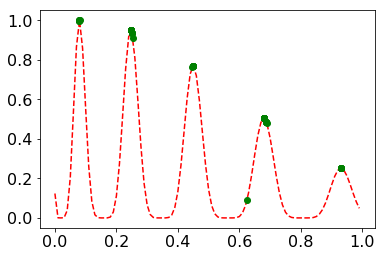

In [25]:
x = np.arange(0, 1, 0.01)
y = M4(x)
opt = M4(fitVal)
plt.plot(x, y,'r--',fitVal,opt,'go')
plt.show()